In [161]:
#load libraries and functions
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report, mean_squared_error
from scikitplot.metrics import plot_lift_curve
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from dmba import stepwise_selection, regressionSummary, classificationSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.tree import DecisionTreeRegressor
from dmba import plotDecisionTree
from dmba import gainsChart
from sklearn.preprocessing import StandardScaler
from scipy.stats import yeojohnson
from sklearn.pipeline import make_pipeline, Pipeline

In [221]:
#Import dataset
hotel = pd.read_csv(r'C:\Users\Halee\Downloads\hotel.csv')
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [222]:
#Check data types and missing values
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
#Look at descriptive statistics of numerical variables
hotel.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [55]:
#Data from children?
adult_zero = pd.DataFrame(hotel[hotel['no_of_adults'] == 0])
adult_zero['booking_status'].value_counts()

Not_Canceled    95
Canceled        44
Name: booking_status, dtype: int64

In [60]:
#Check for rows that report no adults or children
both = pd.DataFrame(hotel[(hotel['no_of_adults'] == 0) & (hotel['no_of_children'] == 0)])
both['booking_status'].value_counts()  # None

Series([], Name: booking_status, dtype: int64)

In [62]:
#Check if any reservations report being not a week or weekend day
no_day_type = pd.DataFrame(hotel[(hotel['no_of_weekend_nights'] == 0) & (hotel['no_of_week_nights'] == 0)])
no_day_type['booking_status'].value_counts()  # Drop these later

Not_Canceled    76
Canceled         2
Name: booking_status, dtype: int64

In [131]:
#Update data types for binary variables
hotel['required_car_parking_space'] = hotel['required_car_parking_space'].astype('category')
hotel['repeated_guest'] = hotel['repeated_guest'].astype('category')
hotel['arrival_year'] = hotel['arrival_year'].astype('category')
hotel['arrival_month'] = hotel['arrival_month'].astype('category')

In [224]:
#Look at class balance and proportion for outcome variables
hotel['booking_status'].value_counts(), hotel['booking_status'].value_counts()/hotel.shape[0]

(Not_Canceled    24390
 Canceled        11885
 Name: booking_status, dtype: int64,
 Not_Canceled    0.672364
 Canceled        0.327636
 Name: booking_status, dtype: float64)

Proportions for Categorical Variables

In [19]:
hotel['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [20]:
hotel['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [21]:
hotel['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [25]:
hotel['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

In [76]:
hotel['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [77]:
hotel['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [78]:
hotel['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [81]:
cats = ['required_car_parking_space','repeated_guest','arrival_year','arrival_month','type_of_meal_plan',
       'room_type_reserved', 'market_segment_type']
nums = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'lead_time', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

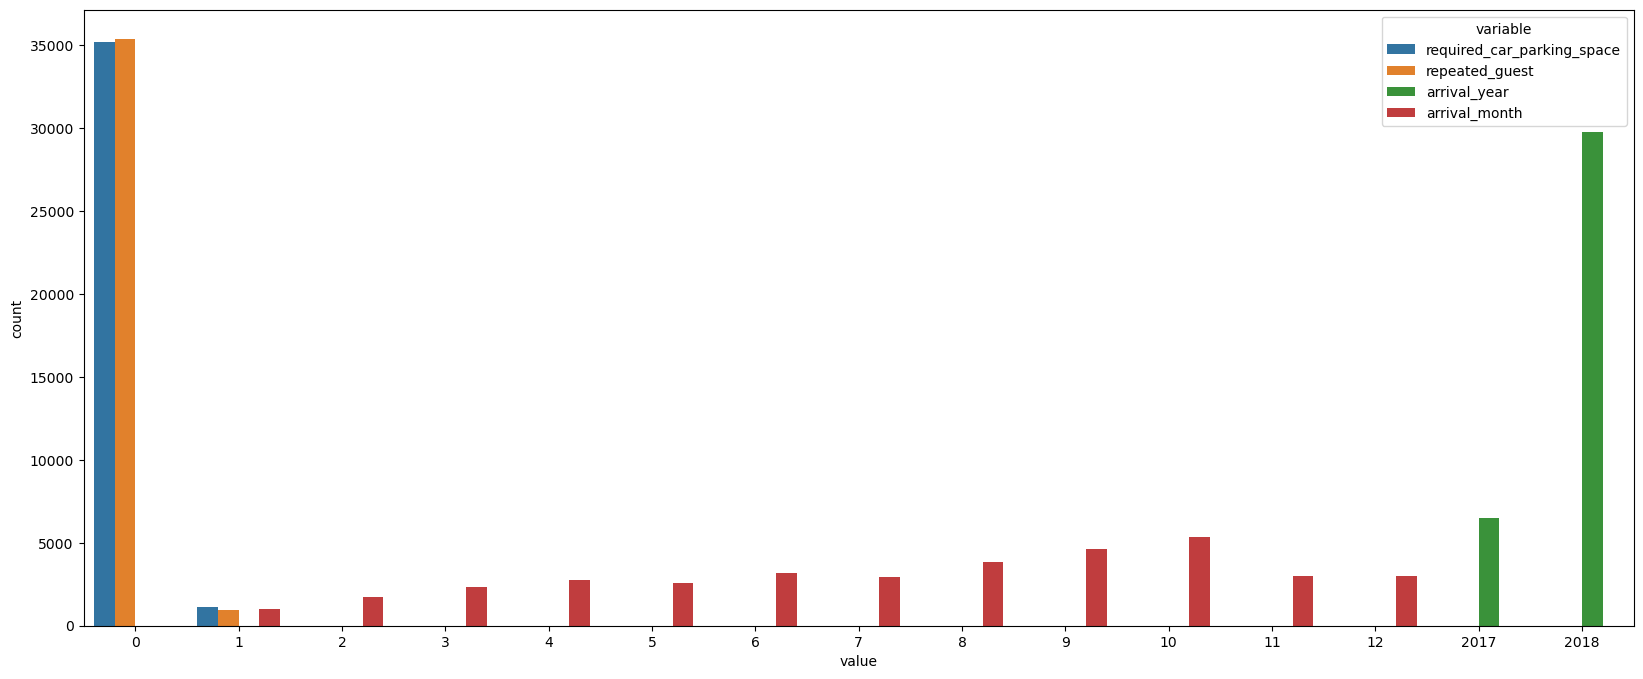

In [97]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='value', hue='variable', data= pd.melt(hotel, value_vars=cats[0:4]))
plt.show()

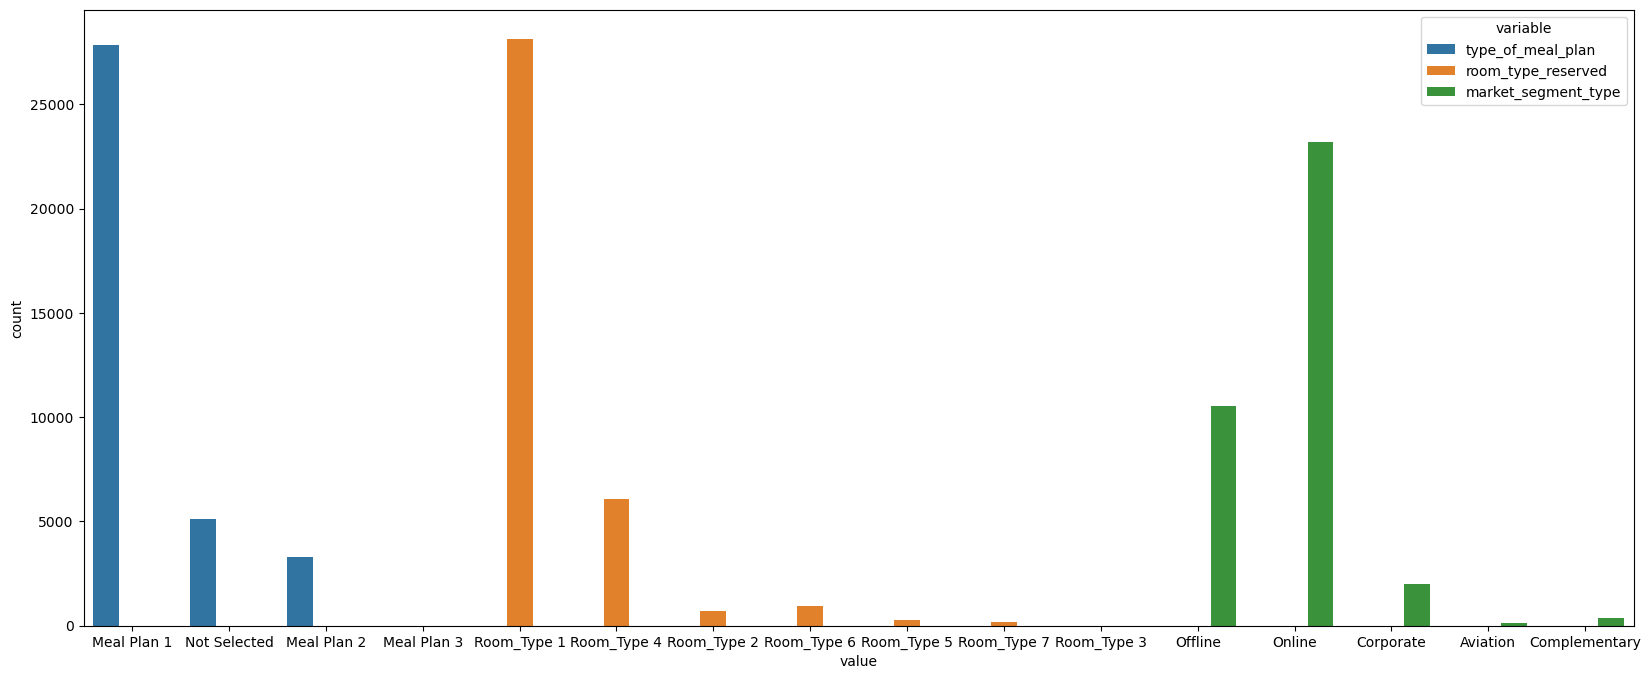

In [98]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='value', hue='variable', data= pd.melt(hotel, value_vars=cats[4:7]))
plt.show()

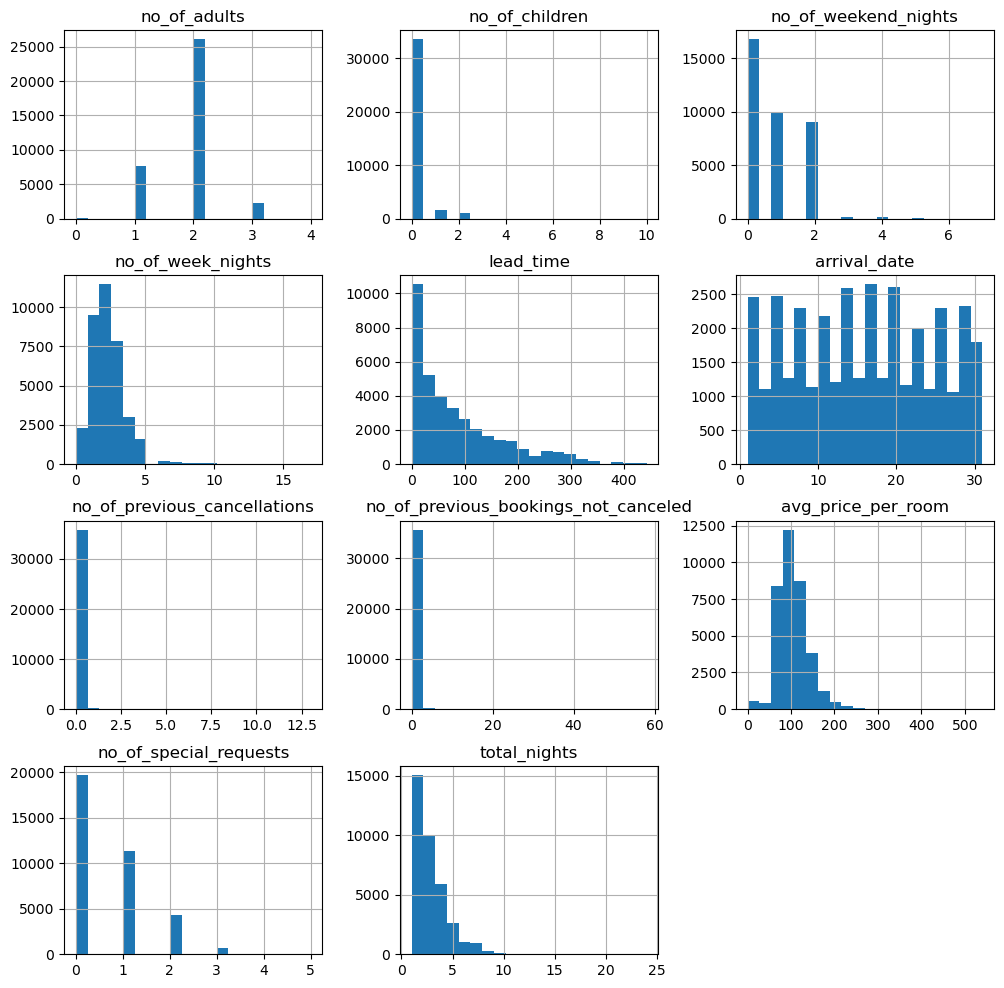

In [195]:
#Distributions for numerical variables
hotel.hist(figsize=(12,12),bins=20)
plt.show()

<AxesSubplot:title={'center':'Heat Map of Correlation Coefficients'}>

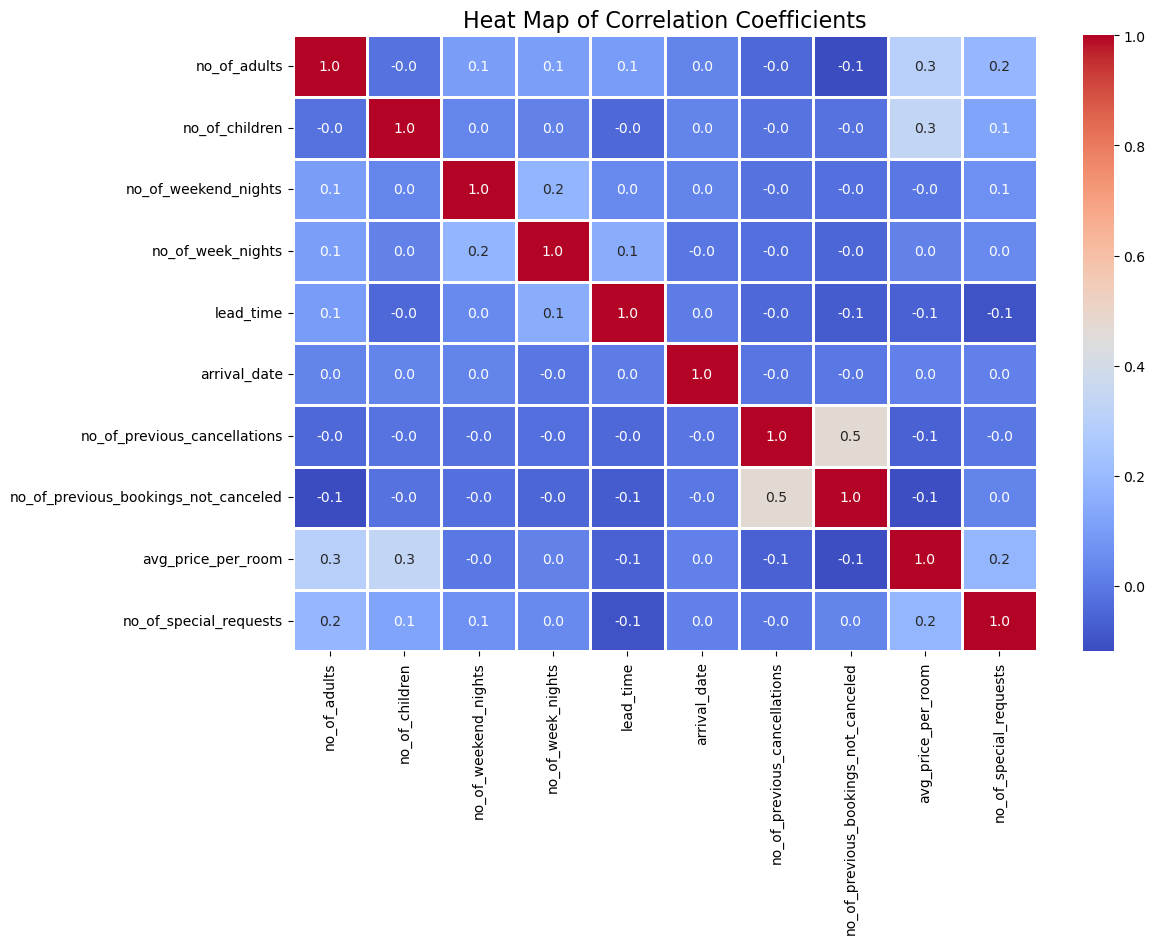

In [27]:
#Correlations between numerical variables
plt.figure(figsize=(12, 8))
plt.title("Heat Map of Correlation Coefficients", fontsize=16)
sns.heatmap(hotel.corr(), cmap = 'coolwarm', fmt = '.1f', linewidths = 1, annot = True)

In [23]:
#All numerical values have low to no correlation with each other
hotel.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.097287,0.021841,0.026338,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.047091,-0.003076,0.025482,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,0.046595,-0.009894,0.027304,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.149650,0.037376,-0.009305,-0.030080,-0.049344,0.022753,0.045994
lead_time,0.097287,-0.047091,0.046595,0.149650,1.000000,0.136814,0.006479,-0.045723,-0.078137,-0.062596,-0.101645
arrival_month,0.021841,-0.003076,-0.009894,0.037376,0.136814,1.000000,-0.042780,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,0.006479,-0.042780,1.000000,-0.012542,-0.001498,0.017898,0.018352
no_of_previous_cancellations,-0.047426,-0.016390,-0.020690,-0.030080,-0.045723,-0.038615,-0.012542,1.000000,0.468147,-0.063340,-0.003317
no_of_previous_bookings_not_canceled,-0.119166,-0.021189,-0.026312,-0.049344,-0.078137,-0.010718,-0.001498,0.468147,1.000000,-0.113684,0.027377
avg_price_per_room,0.296886,0.337728,-0.004525,0.022753,-0.062596,0.054423,0.017898,-0.063340,-0.113684,1.000000,0.184381


# Feature Engineering

In [132]:
#Change meal plan to binary yes/no
meals = []
for i in hotel['type_of_meal_plan']:
    if i == 'Not Selected':
        meals.append('0')
    else:
        meals.append('1')
hotel['meal_plan'] = meals

In [133]:
hotel['meal_plan'].value_counts()

1    31145
0     5130
Name: meal_plan, dtype: int64

In [134]:
#Total number of nights booked
hotel['total_nights'] = pd.array(hotel['no_of_weekend_nights'])+pd.array(hotel['no_of_week_nights'])

In [217]:
#Total profit from reservation = number of nights times price per room
hotel['total_price'] = pd.array(hotel['total_nights'])*pd.array(hotel['avg_price_per_room'])

In [ ]:
#Ratio of completed bookings to cancelled bookings
hotel['book_ratio'] = 

In [218]:
hotel.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights,total_price
count,36197.000000,36197.000000,36197.000000,36197.000000,36197.000000,36197.000000,36197.000000,36197.000000,36197.000000,36197.000000,36197.000000,36197.000000
mean,1.845429,0.105313,0.812471,2.209050,85.313949,15.598005,0.023372,0.153466,103.646404,0.619471,3.021521,313.486718
std,0.518638,0.402725,0.870767,1.408705,85.936931,8.741400,0.368691,1.755786,34.796856,0.786366,1.782442,217.206460
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,8.000000,0.000000,0.000000,80.750000,0.000000,2.000000,176.800000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,16.000000,0.000000,0.000000,99.600000,0.000000,3.000000,270.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,23.000000,0.000000,0.000000,120.120000,1.000000,4.000000,394.200000
max,4.000000,10.000000,7.000000,17.000000,443.000000,31.000000,13.000000,58.000000,540.000000,5.000000,24.000000,3910.000000


# Data Dropping

In [136]:
#Drop values with zero for week days and weekends
hotel.drop(hotel[(hotel['no_of_weekend_nights'] == 0) & (hotel['no_of_week_nights'] == 0)].index, inplace=True)

In [196]:
#Final list of variables
cats_final = ['room_type_reserved', 'market_segment_type']
bis_final = ['required_car_parking_space', 'repeated_guest', 'meal_plan']
nums_final = ['no_of_adults', 'no_of_children', 'lead_time', 'no_of_previous_cancellations',
              'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'total_price']
all_vars = cats_final+bis_final+nums_final
one_hot_labels = 'required_car_parking_space', 'repeated_guest', 'meal_plan', 'no_of_adults', 'no_of_children', 'lead_time', 'no_of_previous_cancellations', 'total_nights',
              #'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [197]:
all_vars

['room_type_reserved',
 'market_segment_type',
 'required_car_parking_space',
 'repeated_guest',
 'meal_plan',
 'no_of_adults',
 'no_of_children',
 'lead_time',
 'no_of_previous_cancellations',
 'total_nights',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

# Data Split and Preprocessing Pipeline

In [138]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,meal_plan,total_nights
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,1,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,0,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,1,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,1,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,0,2


In [198]:
X = hotel[all_vars]
y = hotel['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=15000, random_state=1)

In [199]:
X_train.shape, X_val.shape, X_test.shape

((15000, 13), (12000, 13), (9197, 13))

In [200]:
cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])
num_pipe = Pipeline([('variance', VarianceThreshold()),('skew_standardize', PowerTransformer())])
all_pipe = make_pipeline(ColumnTransformer([('cat', cat_pipe, cats_final),('num', num_pipe, nums_final)]))

In [201]:
X_train = pd.DataFrame(all_pipe.fit_transform(X_train))
X_val = pd.DataFrame(all_pipe.fit_transform(X_val))
X_test = pd.DataFrame(all_pipe.fit_transform(X_test))

In [209]:
X_train.shape, X_val.shape, X_test.shape

((15000, 20), (12000, 20), (9197, 20))

In [215]:
#Add back column names from one-hot encoding
#new_cat_cols = all_pipe.named_transformers_["cat"].get_feature_names(cat_cols)# concatenate categorical columns with numerical columns to get all columns
#all_cols = np.concatenate([num_cols, new_cat_cols])

# Model Training

## L2 penalized logistic regression

In [ ]:
log_l2 = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1).fit(X_train, y_train.values.ravel())

In [ ]:
log_l2.coef_

## KNN Classifier

In [ ]:
knn_results = []
for k in range (1, 15):
    knn_mod = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
    knn_results.append({
        'k': k,
        'Accuracy': accuracy_score(y_val.values.ravel(), knn_mod.predict(X_val)) 
    })
    
knn_results = pd.DataFrame(knn_results)
warnings.filterwarnings('once')
knn_results

In [ ]:
knn = KNeighborsClassifier(n_neighbors = ).fit(X_train, y_train.values.ravel())

## Neural Net

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(6,3), activation = 'logistic', solver = 'lbfgs', random_state=1).fit(X_train, y_train.values.ravel())

## Boosted Tree

In [ ]:
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'n_estimators' : [1,2,3,4,5,10,15,20,25,50,100],
}

tree_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5, n_jobs=-1).fit(X_train, y_train.values.ravel())
tree = tree_search.best_params_

# Model Performance

In [ ]:
#Confusion matrix for logistic regression
log_cm = confusion_matrix(y_true = y_val, y_pred = log_l2.predict(X_val), labels = log_l2.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix= log_cm, display_labels=log_l2.classes_)
log_disp.plot()
plt.show() 

In [ ]:
#ROC curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_val, log_l2.predict(X_val))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [ ]:
#Add lift curve

In [ ]:
#Confusion matrix for k-nearest neighbors
knn_cm = confusion_matrix(y_true = y_val, y_pred = knn.predict(X_val), labels = knn.classes_)
knn_disp = ConfusionMatrixDisplay(confusion_matrix= knn_cm, display_labels=knn.classes_)
knn_disp.plot()
plt.show()
warnings.filterwarnings('ignore')

In [ ]:
#ROC curve for KNN
fpr, tpr, thresholds = roc_curve(y_val, knn.predict(X_val))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [ ]:
#Add lift curve

In [ ]:
#Confusion matrix for neural network
nn_cm = confusion_matrix(y_true = y_val, y_pred = nn.predict(X_val), labels = nn.classes_)
nn_disp = ConfusionMatrixDisplay(confusion_matrix= nn_cm, display_labels=nn.classes_)
nn_disp.plot()
plt.show()  

In [ ]:
#ROC curve for neural net
fpr, tpr, thresholds = roc_curve(y_val, nn.predict(X_val))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [ ]:
#Add lift curve

In [ ]:
#Confusion matrix for boosted tree
tree_cm = confusion_matrix(y_true = y_val, y_pred = tree.predict(X_val), labels = tree.classes_)
tree_disp = ConfusionMatrixDisplay(confusion_matrix= tree_cm, display_labels=tree.classes_)
tree_disp.plot()
plt.show()  

In [ ]:
#ROC curve for boosted tree
fpr, tpr, thresholds = roc_curve(y_val, tree.predict(X_val))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [ ]:
#Add lift curve

# References

* https://saturncloud.io/blog/pandas-seaborn-countplot-from-several-columns/
* https://www.w3schools.com/python/python_ml_auc_roc.asp